In [27]:
import numpy as np

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) #allow imports from parent directory

from util import *
from plotcube import *

In [28]:
#satyrr dimensions
L_arm = 0.11945     #distance from shoulder to elbow
L_forearm = 0.2115  #distance from elbow to end effector

In [29]:
'''https://en.wikipedia.org/wiki/Line%E2%80%93sphere_intersection'''
def sphere_intersect(line_origin, line_dir, sphere_center, sphere_radius):
    o = np.array(line_origin)
    u = np.array(line_dir)/norm(line_dir)
    c = np.array(sphere_center)
    r = sphere_radius

    determinant = np.dot(u, o-c)**2 - (np.dot(o-c,o-c) - r**2)
    if(determinant < 0):
        print(f"No solution found: determinant={determinant}")
        return 0
    else:
        dist_from_line_origin = -np.dot(u, o-c) + np.sqrt(determinant)
        intersect_pt = o + u*dist_from_line_origin
        return intersect_pt, dist_from_line_origin

'''uses law of cosines to get an angle C of a triangle that has known sides a, b, c'''
def get_angle_of_tri(a, b, c):
    return np.arccos((a**2 + b**2 - c**2)/(2*a*b))

def spherical_fwdk(thetas, order=['x','y','z']):
    '''
    Get the orientation after being transformed by a spherical wrist,
    where thetas are the angles for rotation in the xyz axes in the specified order.
    '''
    R = rot_xyz(order[2], thetas[2]) @ rot_xyz(order[1], thetas[1]) @ rot_xyz(order[0], thetas[0])
    return R

def spherical_invk(R):
    '''
    Find the thetas 1-3 of a spherical wrist to create a desired orientation R
    '''
    theta = np.arctan2(R[2,2], np.sqrt(1 - R[2,2]**2))
    phi = np.arctan2(R[0,2], R[1,2])
    psi = np.arctan2(-R[2,0], R[2,1])

    thetas = [theta, phi, psi]
    return thetas

[-0.1 -0. ]


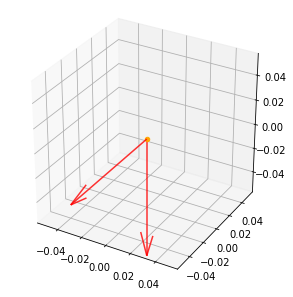

In [34]:


p0 = np.array([0, 0, -0.1])
R = spherical_fwdk(radians([90, 90, 90]), ['y', 'x', 'z'])

p1=R@p0

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')

points = [p0, p1]
points = np.array(points)
print(points[:,2])

plot_arrow(ax, np.zeros(3), p0)
plot_arrow(ax, np.zeros(3), p1)

ax.scatter3D(0, 0, 0, c='orange')
# ax.plot3D(points[:,0], points[:,1], points[:,2])
ax.set_box_aspect([1,1,1])

plt.show()

In [31]:
joy_end = np.array([1, 1, 0])   #position of joystick end effector
end_ang = np.array([1, 0, 0])       #unit vector 
end_ang = end_ang / norm(end_ang)

joy_elb= joy_end - L_forearm * end_ang

sat_elb, _ = sphere_intersect(
    line_origin=joy_end,
    line_dir=joy_end,
    sphere_center=(0,0,0),
    sphere_radius=L_arm
)

sat_end = sat_elb + end_ang*L_forearm
L_sat_end = norm(sat_end)

theta4 = get_angle_of_tri(L_arm, L_forearm, norm(L_sat_end))

theta1 = np.arccos(norm([sat_end[0], sat_end[1]]) / L_sat_end)
# theta1, theta2, theta3 = spherical_invk(angx, angy, angz)

print(theta1)









0.0
